In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
titanic_data = pd.read_csv('Data/titanic.csv')
titanic_data = titanic_data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
titanic_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cols_tranform = ['Sex']

preprcessor = ColumnTransformer(transformers=[('OHE', OneHotEncoder(handle_unknown='ignore'), cols_tranform)])

<Axes: xlabel='Fare', ylabel='Survived'>

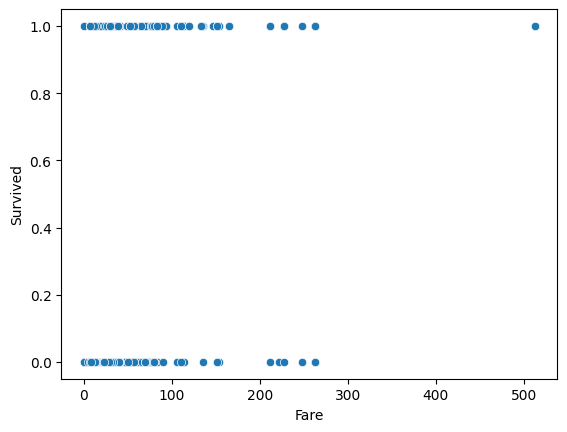

In [15]:
sns.scatterplot(data = titanic_data, y = 'Survived', x = 'Fare')

In [25]:
X = titanic_data.drop(['Survived'], axis = 1)
y = titanic_data['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

model_tree = DecisionTreeClassifier()
model_forest = RandomForestRegressor()

pipeline_tree = Pipeline(steps=[('preprosser', preprcessor), ('model', model_tree)])
pipeline_forest = Pipeline(steps=[('preprosser', preprcessor), ('model', model_forest)])

pipeline_tree.fit(X_train, y_train)
pipeline_forest.fit(X_train, y_train)

print('tree = ', pipeline_tree.score(X_test, y_test),'\n','forest = ', pipeline_forest.score(X_test, y_test))



tree =  0.8295964125560538 
 forest =  0.37946630766851386
